<a href="https://colab.research.google.com/github/sirrelll/AVD/blob/main/Matplotlib_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca Data

In [5]:
df = pd.read_csv("/content/goldstock v1.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# Scatter Plot

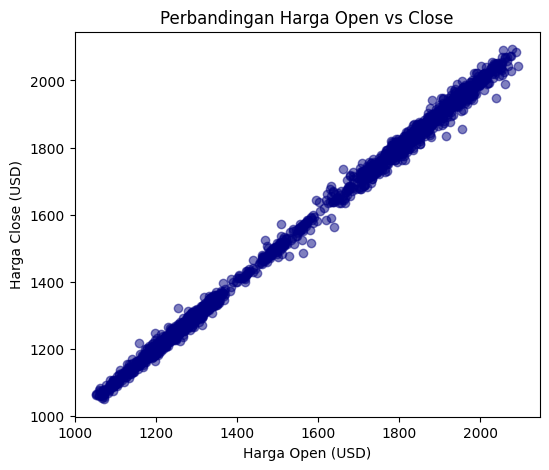

In [22]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Open'], df['Close'], color='navy', alpha=0.5)
plt.title('Perbandingan Harga Open vs Close')
plt.xlabel('Harga Open (USD)')
plt.ylabel('Harga Close (USD)')
plt.show()


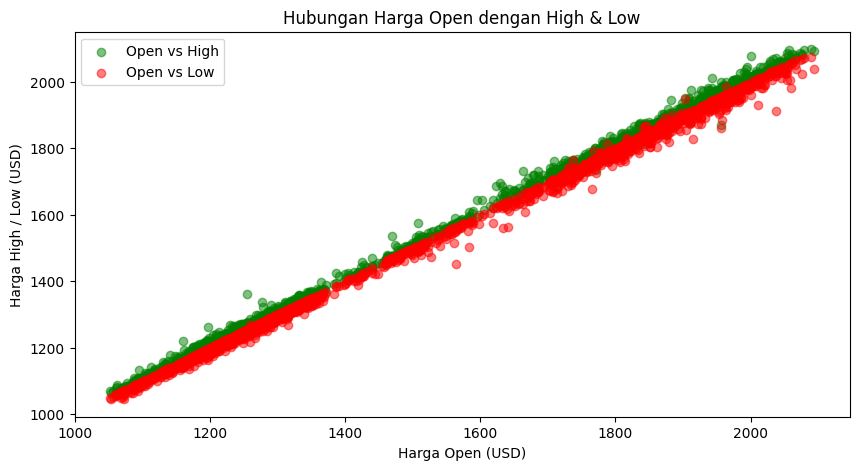

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Open'], df['High'], color='green', label='Open vs High', alpha=0.5)
plt.scatter(df['Open'], df['Low'], alpha=0.5, color='red', label='Open vs Low')
plt.title('Hubungan Harga Open dengan High & Low')
plt.xlabel('Harga Open (USD)')
plt.ylabel('Harga High / Low (USD)')
plt.legend()
plt.show()


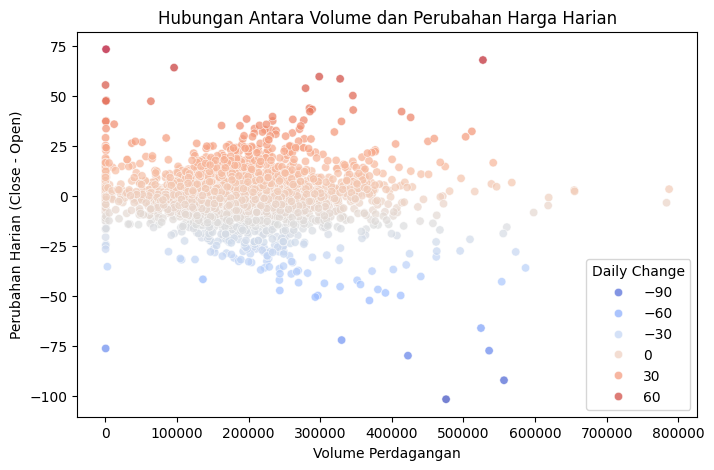

In [28]:
df['Daily Change'] = df['Close'] - df['Open']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Volume', y='Daily Change', hue='Daily Change', palette='coolwarm', alpha=0.7)
plt.title('Hubungan Antara Volume dan Perubahan Harga Harian')
plt.xlabel('Volume Perdagangan')
plt.ylabel('Perubahan Harian (Close - Open)')
plt.show()


# Histogram

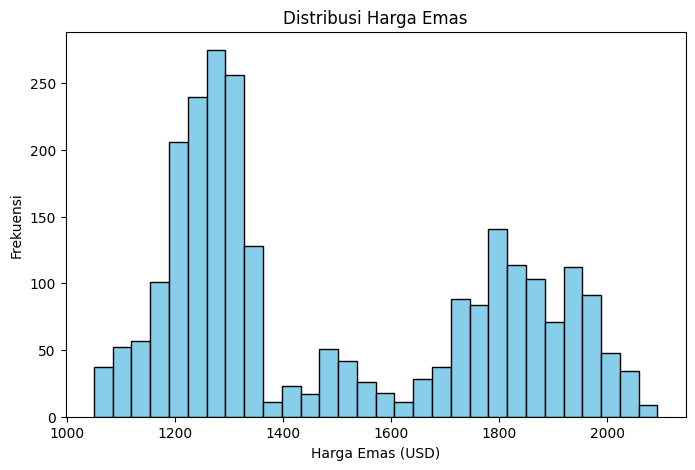

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Emas')
plt.xlabel('Harga Emas (USD)')
plt.ylabel('Frekuensi')
plt.show()


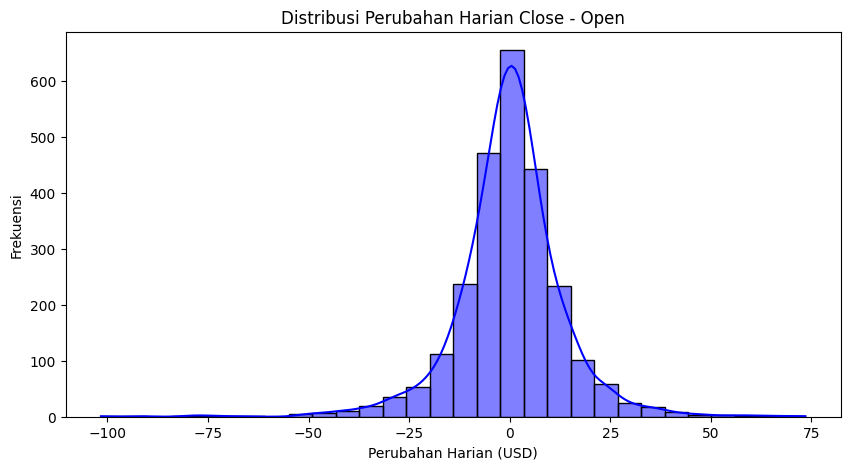

In [50]:
df['Daily Change'] = df['Close'] - df['Open']
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Change'], bins=30, kde=True, edgecolor='black', color='blue')
plt.title('Distribusi Perubahan Harian Close - Open')
plt.xlabel('Perubahan Harian (USD)')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

# Line Chart

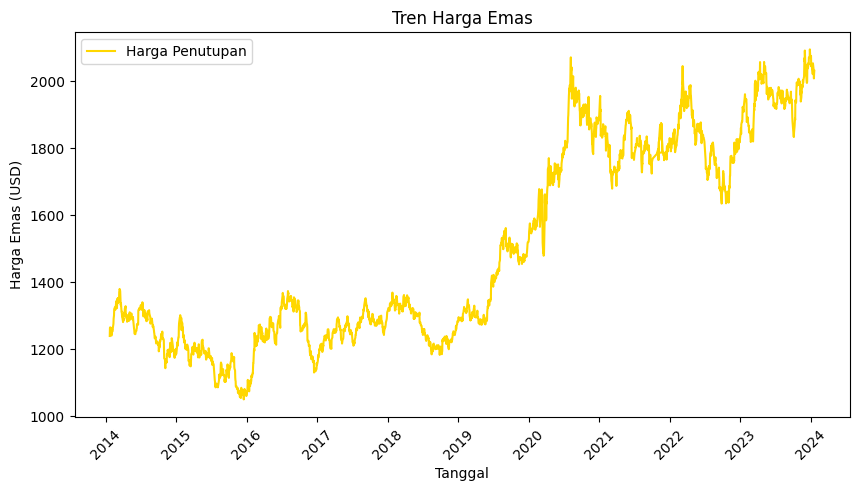

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], color='gold', label='Harga Penutupan')
plt.title('Tren Harga Emas')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


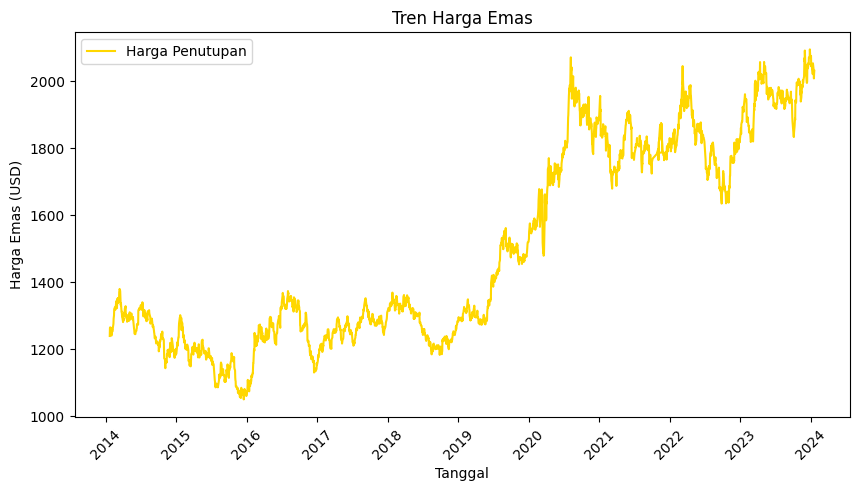

In [51]:
price_avg = df[['Open', 'High', 'Low', 'Close']].mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], color='gold', label='Harga Penutupan')
plt.title('Tren Harga Emas')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


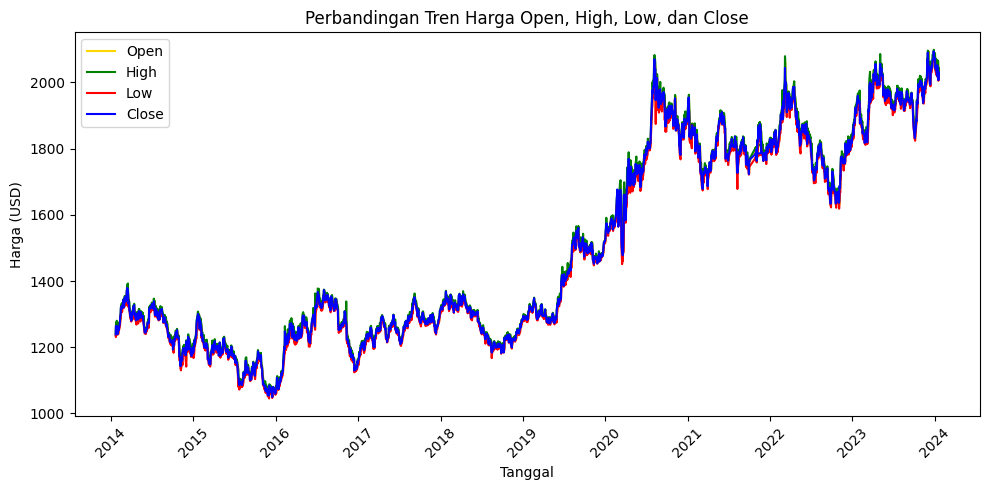

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Open'], label='Open', color='gold')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='blue')

plt.title('Perbandingan Tren Harga Open, High, Low, dan Close')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Chart

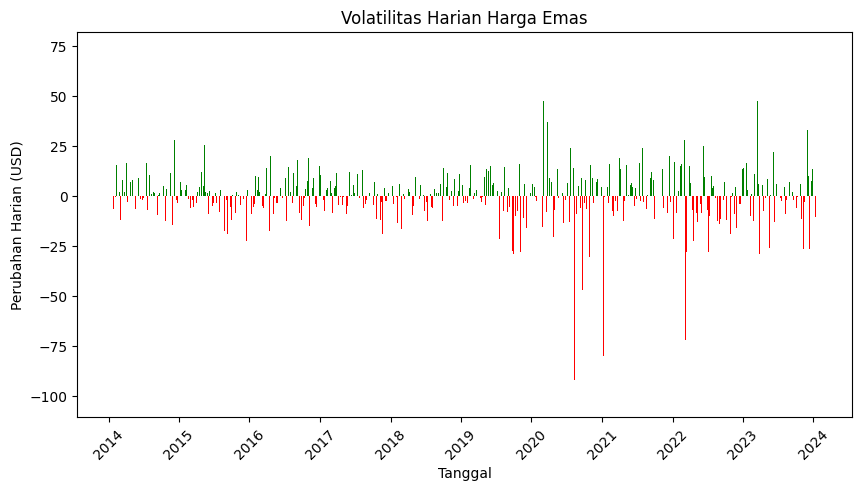

In [15]:
df['Daily Change'] = df['Close'] - df['Open']
plt.figure(figsize=(10, 5))
plt.bar(df['Date'], df['Daily Change'], color=['red' if x < 0 else 'green' for x in df['Daily Change']])
plt.title('Volatilitas Harian Harga Emas')
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harian (USD)')
plt.xticks(rotation=45)
plt.show()


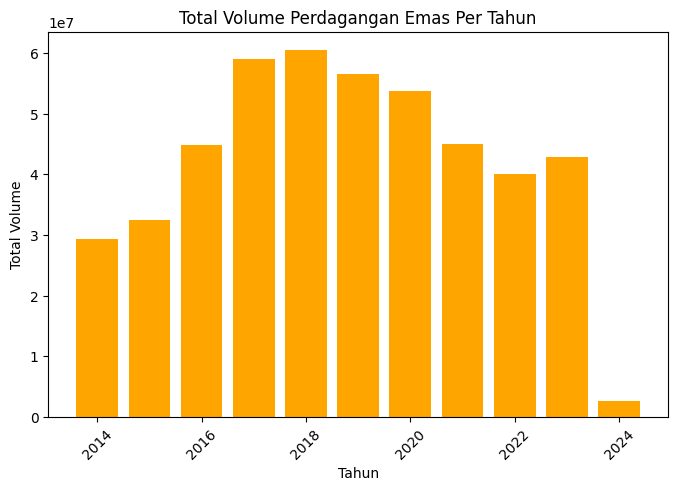

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
volume_per_tahun = df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(8, 5))
plt.bar(x=volume_per_tahun.index, height=volume_per_tahun.values, color='orange')
plt.title('Total Volume Perdagangan Emas Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.show()


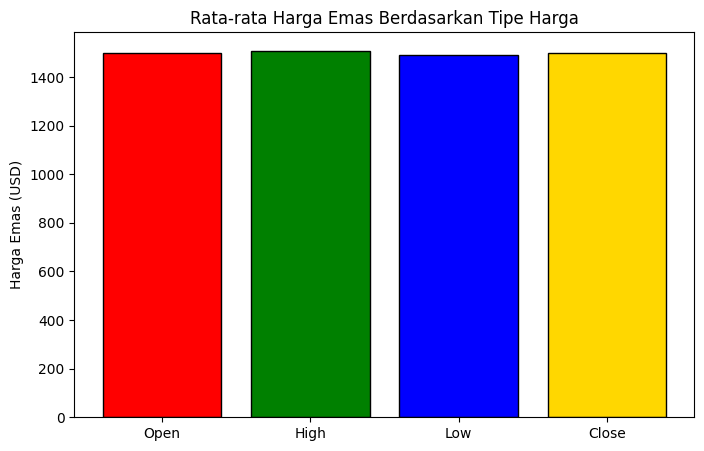

In [10]:
price_avg = df[['Open', 'High', 'Low', 'Close']].mean()
plt.bar(price_avg.index, price_avg.values, edgecolor='black', color=['red', 'green', 'blue', 'gold'])
plt.title('Rata-rata Harga Emas Berdasarkan Tipe Harga')
plt.ylabel('Harga Emas (USD)')
plt.show()


# Box Plot

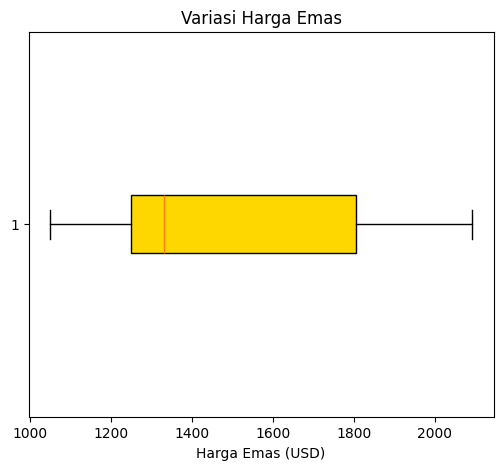

In [13]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Close'], vert=False, patch_artist=True, boxprops=dict(facecolor='gold'))
plt.title('Variasi Harga Emas')
plt.xlabel('Harga Emas (USD)')
plt.show()


# Heatmap

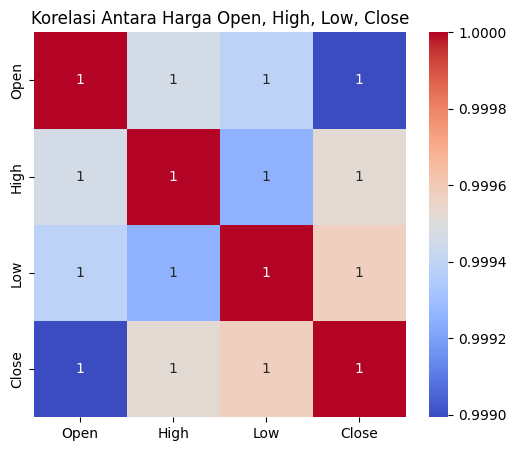

In [14]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Harga Open, High, Low, Close')
plt.show()


# Pie Chart

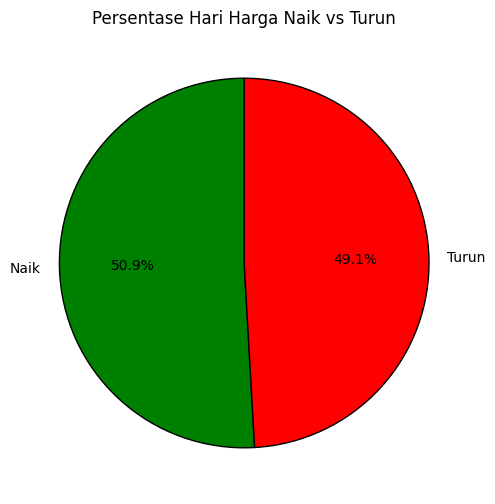

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df['Daily Change'] = df['Close'] - df['Open']
change_counts = df['Daily Change'].apply(lambda x: 'Naik' if x > 0 else 'Turun').value_counts()

plt.figure(figsize=(6, 6))
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', colors=['green', 'red'],
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Persentase Hari Harga Naik vs Turun')
plt.show()
